In [63]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

**2.Reading and Exploring the Data**

In [17]:
data= pd.read_csv('./ml-25m/movies.csv')
data.shape

(62423, 3)

In [18]:
data.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


In [20]:
movies = data['movieId'].unique().tolist()
len(movies)

62423

In [21]:
ratings_data=pd.read_csv('./ml-25m/ratings.csv',sep=',')
ratings_data.shape

(25000095, 4)

In [22]:
ratings_data.describe()

,userId,movieId,rating,timestamp
count,2.500010e+07,2.500010e+07,2.500010e+07,2.500010e+07
mean,8.118928e+04,2.138798e+04,3.533854e+00,1.215601e+09
std,4.679172e+04,3.919886e+04,1.060744e+00,2.268758e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,4.051000e+04,1.196000e+03,3.000000e+00,1.011747e+09
50%,8.091400e+04,2.947000e+03,3.500000e+00,1.198868e+09
75%,1.215570e+05,8.623000e+03,4.000000e+00,1.447205e+09
max,1.625410e+05,2.091710e+05,5.000000e+00,1.574328e+09


In [23]:
ratings_data['rating'].min() 

0.5

In [24]:
ratings_data['rating'].max()

5.0

**3.Cleaning of data**

In [25]:
data.shape

(62423, 3)

In [26]:
data.isnull().any()

movieId    False
title      False
genres     False
dtype: bool

In [27]:
ratings_data.shape

(25000095, 4)

In [28]:
ratings_data.isnull().any()

userId       False
movieId      False
rating       False
timestamp    False
dtype: bool

In [29]:
tags_data=pd.read_csv('./ml-25m/tags.csv',sep=',')
tags_data.shape

(1093360, 4)

In [30]:
tags_data.isnull().any()

userId       False
movieId      False
tag           True
timestamp    False
dtype: bool

In [31]:
tags_data=tags_data.dropna()

In [32]:
tags_data.isnull().any()

userId       False
movieId      False
tag          False
timestamp    False
dtype: bool

In [33]:
unique_tags=tags_data['tag'].unique().tolist()
len(unique_tags)


73050

**4.Data Analysis**

In [34]:
drama_movies=data['genres'].str.contains('Drama')
data[drama_movies].head()

,movieId,title,genres
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
10,11,"American President, The (1995)",Comedy|Drama|Romance
13,14,Nixon (1995),Drama
15,16,Casino (1995),Crime|Drama
16,17,Sense and Sensibility (1995),Drama|Romance


In [35]:
drama_movies.shape

(62423,)

In [36]:
comedy_movies = data['genres'].str.contains('Comedy')
data[comedy_movies].head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
6,7,Sabrina (1995),Comedy|Romance


In [37]:
comedy_movies.shape

(62423,)

In [38]:
tag_search = tags_data['tag'].str.contains('dark')
tags_data[tag_search].head()

,userId,movieId,tag,timestamp
2,4,1732,dark comedy,1573943598
610,113,608,dark comedy,1478897216
625,150,104879,dark,1422348976
645,187,91007,dark,1427089602
674,220,151367,dark humor,1453320837


In [39]:
ratings_data.head() 

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [40]:
del ratings_data['timestamp']

In [41]:
ratings_data.head() 

,userId,movieId,rating
0,1,296,5.0
1,1,306,3.5
2,1,307,5.0
3,1,665,5.0
4,1,899,3.5


In [42]:
data.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [43]:
movie_data_ratings_data=data.merge(ratings_data,on = 'movieId',how = 'inner')
movie_data_ratings_data.head(3)

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,3.5
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4,3.0


In [44]:
high_rated= movie_data_ratings_data['rating']>4.0
movie_data_ratings_data[high_rated].head(10)

,movieId,title,genres,userId,rating
10,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,36,5.0
22,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,75,5.0
25,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,86,5.0
26,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,90,5.0
27,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,93,5.0
28,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,95,5.0
29,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,96,5.0
30,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,98,5.0
33,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,111,4.5
35,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,120,5.0


In [45]:
low_rated = movie_data_ratings_data['rating']<4.0
movie_data_ratings_data[low_rated].head()

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,3.5
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4,3.0
5,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,10,3.5
8,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,18,3.0
9,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,26,3.0


In [46]:
unique_genre=data['genres'].unique().tolist()
len(unique_genre)

1639

In [47]:
most_rated = movie_data_ratings_data.groupby('title').size().sort_values(ascending=False)[:25]
most_rated.head(25)

title
Forrest Gump (1994)                                                               81491
Shawshank Redemption, The (1994)                                                  81482
Pulp Fiction (1994)                                                               79672
Silence of the Lambs, The (1991)                                                  74127
Matrix, The (1999)                                                                72674
Star Wars: Episode IV - A New Hope (1977)                                         68717
Jurassic Park (1993)                                                              64144
Schindler's List (1993)                                                           60411
Braveheart (1995)                                                                 59184
Fight Club (1999)                                                                 58773
Terminator 2: Judgment Day (1991)                                                 57379
Star Wars: Episode V - The

In [48]:
data[['title','genres']].head()

,title,genres
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,Jumanji (1995),Adventure|Children|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama|Romance
4,Father of the Bride Part II (1995),Comedy


In [49]:
data['year'] =data['title'].str.extract('.*\((.*)\).*',expand = False)
data.head(5)

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [50]:
def count_word(df, ref_col, liste):
    keyword_count = dict()
    for s in liste: keyword_count[s] = 0
    for liste_keywords in df[ref_col].str.split('|'):
        if type(liste_keywords) == float and pd.isnull(liste_keywords): continue
        for s in liste_keywords: 
            if pd.notnull(s): keyword_count[s] += 1

    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count

In [51]:
genre_labels = set()
for s in data['genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))

In [52]:
keyword_occurences, dum = count_word(data, 'genres', genre_labels)
keyword_occurences

[['Drama', 25606],
 ['Comedy', 16870],
 ['Thriller', 8654],
 ['Romance', 7719],
 ['Action', 7348],
 ['Horror', 5989],
 ['Documentary', 5605],
 ['Crime', 5319],
 ['(no genres listed)', 5062],
 ['Adventure', 4145],
 ['Sci-Fi', 3595],
 ['Children', 2935],
 ['Animation', 2929],
 ['Mystery', 2925],
 ['Fantasy', 2731],
 ['War', 1874],
 ['Western', 1399],
 ['Musical', 1054],
 ['Film-Noir', 353],
 ['IMAX', 195]]

**5.Data Visualization**

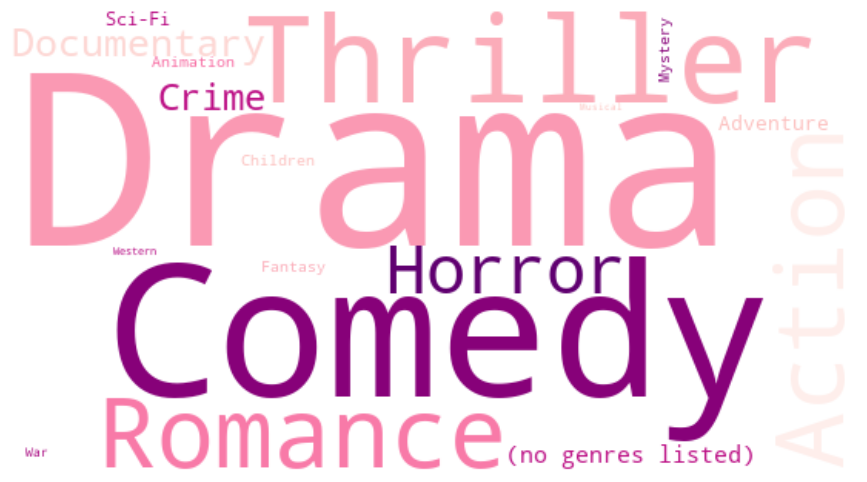

In [62]:
def random_color_func(word=None, font_size=None, position=None,
                      orientation=None, font_path=None, random_state=None):
    h = int(360.0 * tone / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(70, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)


words = dict()
trunc_occurences = keyword_occurences[0:50]
for s in trunc_occurences:
    words[s[0]] = s[1]
tone = 100
f, ax = plt.subplots(figsize=(14, 6))
wordcloud = WordCloud(width=550,height=300, background_color='white', 
                      max_words=1628,relative_scaling=0.7,
                      normalize_plurals=False, colormap='RdPu')
wordcloud.generate_from_frequencies(words)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

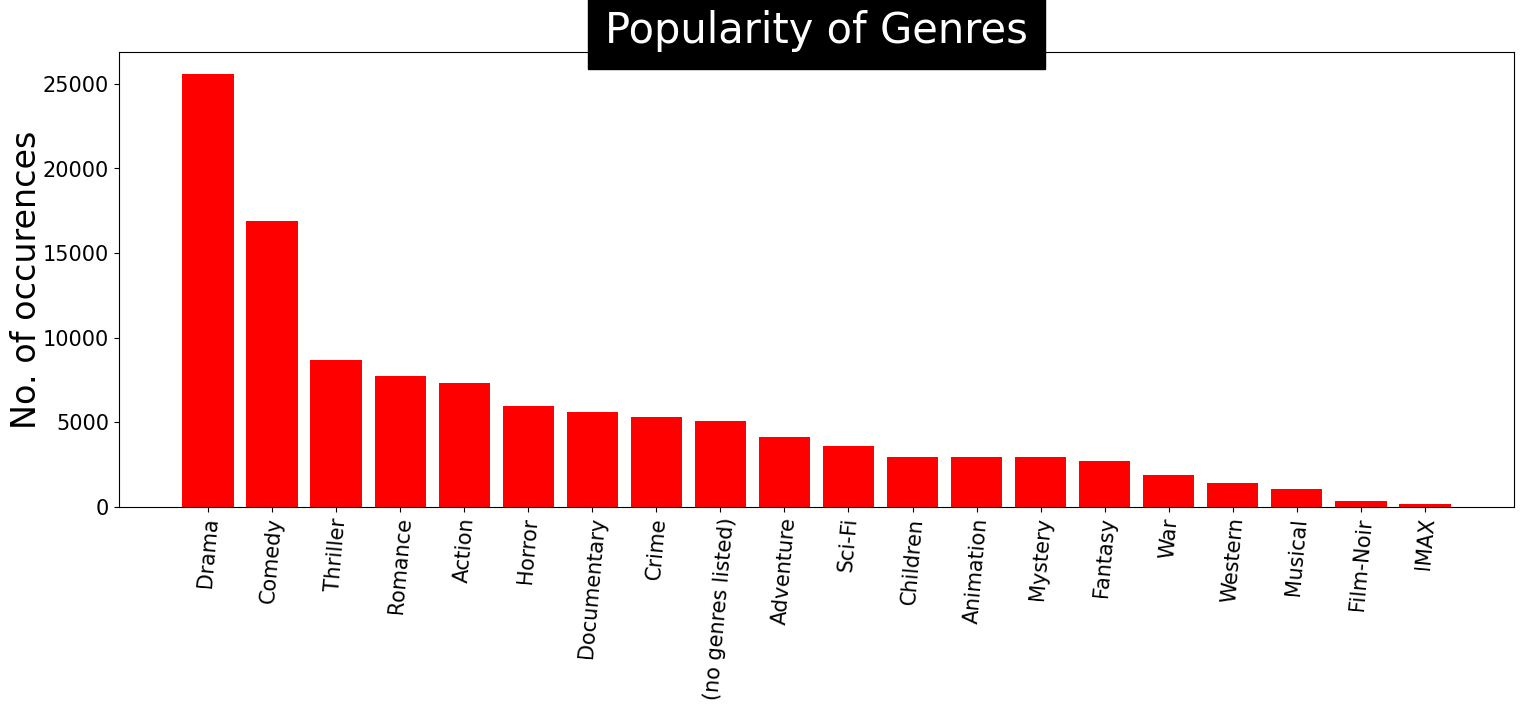

In [54]:
fig = plt.figure(1, figsize=(18,13))
ax2 = fig.add_subplot(2,1,2)
y_axis = [i[1] for i in trunc_occurences]
x_axis = [k for k,i in enumerate(trunc_occurences)]
x_label = [i[0] for i in trunc_occurences]
plt.xticks(rotation=85, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(x_axis, x_label)
plt.ylabel("No. of occurences", fontsize = 24, labelpad = 0)
ax2.bar(x_axis, y_axis, align = 'center', color='r')
plt.title("Popularity of Genres",bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 30)
plt.show()